**Hands-on Session: Building and Training an Artificial Neural Network**

**Introduction to ANNs**

**What is an ANN?**

An ANN is a computational model inspired by the way biological neural networks in the human brain process information.
It consists of layers of interconnected nodes (neurons), where each connection has an associated weight.

**Basic Concepts:**

**Neurons:** In artificial neural networks (ANNs), neurons are computational units that process input data. They receive inputs, apply weights and biases, pass the result through an activation function, and then produce an output, helping to make predictions or classifications in machine learning tasks.

**Layers:** In an Artificial Neural Network (ANN), the layers are structured as follows:

1. **Input Layer**: This layer receives the raw data features and passes them to the next layer. Each neuron corresponds to one feature in the input dataset.
   
2. **Hidden Layers**: These layers perform the main computations by applying weights, biases, and activation functions to the input data. An ANN can have multiple hidden layers, each helping to extract more complex features from the data.

3. **Output Layer**: This layer produces the final result, either a classification or regression output, depending on the problem. The number of neurons in this layer matches the number of output classes or values.

Each layer is connected through weighted edges, allowing information to flow from the input to the output in a structured manner.

**Activation functions:** Activation functions in ANNs introduce non-linearity, enabling complex pattern learning. Common types include Sigmoid and Tanh, which squash outputs (which map input values into a bounded interval, for instance, the Sigmoid function squashes outputs to the range [0, 1], and the Tanh function maps values to [-1, 1]), ReLU for simplicity and efficiency, Leaky ReLU to fix dead neurons, and Softmax for multi-class classification outputs.

**Weights and Biases:** Weights and biases in ANNs are parameters that determine the strength of connections between neurons. Weights adjust the input signal's importance, while biases shift the activation function's output. These values are optimized during training to minimize the model's error.

**Step 1: Import Libraries**

In [1]:
import numpy as np                                       #It imports NumPy for numerical operations
from tensorflow.keras.models import Sequential           #This line imports the Sequential class from the tensorflow.keras.models module. The Sequential model is a linear stack of layers. You can create a model by adding layers to it in a sequential manner, making it easy to build simple feedforward neural networks.
from tensorflow.keras.layers import Dense                #This line imports the Dense class from the tensorflow.keras.layers module. A Dense layer is a fully connected layer in a neural network, where each neuron in the layer is connected to every neuron in the previous layer. It’s commonly used as a building block in neural networks to perform computations.
from sklearn.datasets import load_iris                   #This line imports the load_iris function from the sklearn.datasets module. The load_iris function is used to load the Iris dataset, a well-known dataset in machine learning that contains features of different iris flower species. This dataset is often used for classification tasks.
from sklearn.model_selection import train_test_split     #This line imports the train_test_split function from the sklearn.model_selection module. The train_test_split function is used to split a dataset into training and testing subsets. This is crucial for evaluating the performance of a machine learning model. It randomly partitions the data to ensure that both training and testing datasets are representative.
from sklearn.preprocessing import StandardScaler         #This line imports the StandardScaler class from the sklearn.preprocessing module.The StandardScaler is used to standardize features by removing the mean and scaling to unit variance. This is important for many machine learning algorithms to ensure that features contribute equally to the result and to improve convergence speed during training.

**Step 2: Prepare the Dataset**

In [2]:
# Load dataset
iris = load_iris()      #This line calls the load_iris function to load the Iris dataset and assigns it to the variable iris. The dataset contains both the features (input data) and the labels (target species).
X = iris.data           #Here, the features (input data) of the Iris dataset are extracted and stored in the variable X. iris.data is a 2D array where each row corresponds to a sample and each column corresponds to a feature (like sepal length, sepal width, etc.).
y = iris.target         #This line extracts the target labels (species of the iris flowers) from the dataset and stores them in the variable y. iris.target is a 1D array of integers representing the class labels.

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)     #This line uses the train_test_split function to divide the dataset into training and testing subsets. X_train and X_test are the feature sets for training and testing, respectively, while y_train and y_test are the corresponding target labels. test_size=0.2 indicates that 20% of the data will be used for testing, while 80% will be for training. random_state=42 ensures reproducibility by setting a seed for the random number generator, so that the same split can be obtained every time the code is run.

# Standardize the dataset
scaler = StandardScaler()                     #This line creates an instance of the StandardScaler class, which will be used to standardize the feature data. The StandardScaler standardizes the data by removing the mean and scaling to unit variance.
X_train = scaler.fit_transform(X_train)       #fit_transform first computes the mean and standard deviation of X_train, then transforms it into a standardized format (mean=0, variance=1). The standardized training data is then reassigned to X_train.
X_test = scaler.transform(X_test)             #This line standardizes the test data using the parameters (mean and standard deviation) computed from the training data.transform applies the same scaling to X_test to ensure that the training and testing data are on the same scale, which is essential for the model to make accurate predictions.


**Step 3: Build the ANN Model**

In [3]:
model = Sequential()     #This initializes a Sequential model, which is a linear stack of layers in Keras. Layers are added one after another.
model.add(Dense(10, input_dim=4, activation='relu'))     #Adds a Dense (fully connected) layer with 10 neurons.input_dim=4 specifies that the input has 4 features (dimensions). The ReLU (Rectified Linear Unit) activation function introduces non-linearity by outputting the input if positive, and zero otherwise.
model.add(Dense(8, activation='relu'))     #Adds another Dense layer with 8 neurons. No need to specify input dimensions since it's inferred from the previous layer. Uses ReLU activation again to add non-linearity.
model.add(Dense(3, activation='softmax'))    #Adds a final Dense layer with 3 neurons (typically for multi-class classification). The Softmax activation function converts the output to probabilities, ensuring the values sum to 1. This is typically used in the output layer for multi-class classification problems.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 4: Compile the Model**

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])     #specifying the optimization algorithm (Adam), the loss function for a multi-class classification problem (sparse_categorical_crossentropy), and the metric to track during training and validation (accuracy).

**Step 5: Train the Model**

In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))     #fitting (training) a neural network model using the training data (X_train and y_train) for 50 epochs, with updates happening every 5 samples, and it evaluates performance on the validation dataset (X_test and y_test) at the end of each epoch. The training history is stored in the history variable for later analysis.

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2872 - loss: 1.2308 - val_accuracy: 0.3667 - val_loss: 0.9116
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4028 - loss: 0.9611 - val_accuracy: 0.5667 - val_loss: 0.7721
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5581 - loss: 0.8636 - val_accuracy: 0.7333 - val_loss: 0.6759
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.6788 - val_accuracy: 0.7333 - val_loss: 0.6033
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - loss: 0.6982 - val_accuracy: 0.8000 - val_loss: 0.5499
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.6560 - val_accuracy: 0.8333 - val_loss: 0.5087
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7457 - loss: 0.6433 - val_accuracy: 0.8333 - val_loss: 0.4737
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7632 - loss: 0.5578 - val_accuracy: 0.8667 - val_loss

**Step 6: Evaluate the Model**

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)     #This line evaluates the trained model on the test dataset (X_test, y_test).The model.evaluate() method returns two values: loss and accuracy.
print(f'Test Accuracy: {accuracy:.2f}')        #Prints the test accuracy in a formatted string using f-string syntax.The accuracy:.2f formats the accuracy to 2 decimal places for better readability.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 1.0000 - loss: 0.0565
Test Accuracy: 1.00


**Visualizing the Training Process**

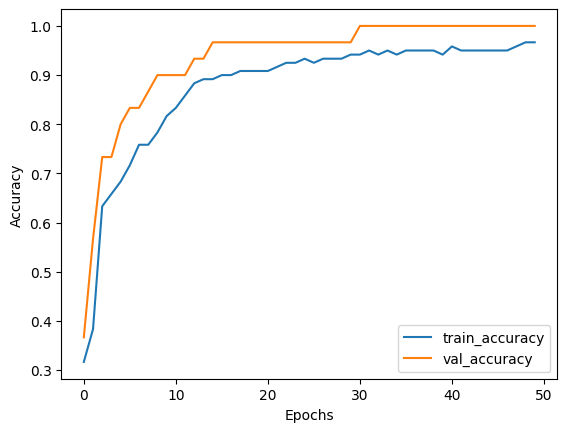

In [7]:
import matplotlib.pyplot as plt     #Imports the matplotlib.pyplot library, which provides functions to create static, animated, and interactive visualizations in Python. The alias plt is used to shorten the function calls.

plt.plot(history.history['accuracy'], label='train_accuracy')       #Plots the training accuracy over epochs. The history.history['accuracy'] object contains the accuracy values for each epoch from the training process. The label='train_accuracy' assigns a label to the plot, so it can be identified in the legend.
plt.plot(history.history['val_accuracy'], label='val_accuracy')     #Plots the validation accuracy over epochs. history.history['val_accuracy'] holds accuracy values for validation data. The label 'val_accuracy' is assigned for the legend.
plt.xlabel('Epochs')        #Sets the label for the x-axis to "Epochs", indicating that the x-axis represents the number of epochs during training.
plt.ylabel('Accuracy')      #Sets the label for the y-axis to "Accuracy", showing that the y-axis represents the accuracy values.
plt.legend()                #Adds a legend to the plot, which displays the labels (train_accuracy and val_accuracy) for the different lines on the graph.
plt.show()                  #Displays the plot on the screen, showing the training and validation accuracy curves over the epochs.


**Key Observations:**

**Training Accuracy:**
Rapid increase in the first 5 epochs.
Gradual improvement until it plateaus near 1.0 (or 100% accuracy).

**Validation Accuracy:**
Follows a similar trend but consistently lower than training accuracy.
Indicates the model performs slightly worse on unseen data compared to training data.